## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from util import DataLoaders

In [5]:
# Load data for exploratory analysis
datafile = DataLoaders.FileDataLoader('../data/final_dataset.csv')
df = datafile.load_data()

In [6]:
df.head()

,user_id,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
0,1004889,14.0,private,70773.00,9,Never-married,sales,not_caucasian,Male,0.0,0.0,40,399.0,NaN,0
1,1012811,25.0,private,76597.00,9,Divorced,sales,caucasian,Female,0.0,0.0,30,256.0,NaN,0
2,1006870,21.0,private,47947.25,10,Never-married,clerical,caucasian,Female,0.0,0.0,10,442.0,276.0,0
3,1022149,23.0,private,41740.25,7,Divorced,sales,caucasian,Female,0.0,0.0,20,NaN,NaN,0
4,1029558,26.0,private,NaN,9,Married,sales,not_caucasian,Male,NaN,0.0,36,NaN,120.0,0


In [30]:
df.shape

(13599, 15)

In [7]:
df.describe()

,user_id,age,salary,education_rank,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
count,1.359900e+04,13178.000000,13177.000000,13599.000000,13175.000000,13178.000000,13599.000000,11170.000000,11188.000000,13599.000000
mean,1.033131e+06,44.842009,37149.297355,10.675417,447.920607,46.034224,39.916317,217.276544,359.708169,0.085889
std,1.603004e+04,16.050574,24316.155119,2.224582,4782.134102,294.234126,9.839082,113.944411,164.680579,0.280210
min,1.000006e+06,14.000000,4872.750000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.019192e+06,30.000000,20885.500000,9.000000,0.000000,0.000000,40.000000,175.000000,223.750000,0.000000
50%,1.038625e+06,50.000000,25912.750000,12.000000,0.000000,0.000000,40.000000,175.000000,447.000000,0.000000
75%,1.048161e+06,59.000000,48908.750000,12.000000,0.000000,0.000000,40.000000,276.000000,499.000000,0.000000
max,1.048839e+06,90.000000,363858.750000,16.000000,99999.000000,3900.000000,99.000000,499.000000,499.000000,1.000000


In [8]:
# Check for missing values in the dataset
df.isnull().sum()

user_id                      0
age                        421
workclass                  543
salary                     422
education_rank               0
marital-status               0
occupation                 543
race                         0
sex                          0
mins_beerdrinking_year     424
mins_exercising_year       421
works_hours                  0
tea_per_year              2429
coffee_per_year           2411
great_customer_class         0
dtype: int64

There are many missing values in the dataset. More specifically, *tea_per_year* and *coffee_per_year* have the most missing values.

In [29]:
# Count how many rows with missing values
df.apply(lambda x: any(x.isna()), axis=1).sum()

5163

In total, there are 5163 rows with missing values (out of ~13000 rows). That's a lot. Need to find a way to fill in the missing values.

In [9]:
df.corr()

,user_id,age,salary,education_rank,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
user_id,1.000000,0.501823,-0.377728,0.327658,-0.058743,-0.081948,0.008638,-0.266291,0.567604,-0.163365
age,0.501823,1.000000,-0.418150,0.338892,0.018385,-0.037647,0.041650,-0.249540,0.555050,0.055400
salary,-0.377728,-0.418150,1.000000,-0.265910,0.041813,0.053870,-0.010487,0.195358,-0.429323,0.133205
education_rank,0.327658,0.338892,-0.265910,1.000000,0.069731,-0.000616,0.116610,-0.160003,0.382846,0.128017
mins_beerdrinking_year,-0.058743,0.018385,0.041813,0.069731,1.000000,-0.014369,0.061008,0.027532,-0.060082,0.253218
mins_exercising_year,-0.081948,-0.037647,0.053870,-0.000616,-0.014369,1.000000,0.051714,0.022723,-0.088012,0.170544
works_hours,0.008638,0.041650,-0.010487,0.116610,0.061008,0.051714,1.000000,-0.003988,-0.000358,0.168146
tea_per_year,-0.266291,-0.249540,0.195358,-0.160003,0.027532,0.022723,-0.003988,1.000000,-0.278121,0.092783
coffee_per_year,0.567604,0.555050,-0.429323,0.382846,-0.060082,-0.088012,-0.000358,-0.278121,1.000000,-0.187042
great_customer_class,-0.163365,0.055400,0.133205,0.128017,0.253218,0.170544,0.168146,0.092783,-0.187042,1.000000


Some interesting observations from the correlations. *Salary* has some reasonable correlations with *age*, *education_rank* and *coffee_per_year*. Higher earners drink less coffees! Perhaps, we can impute some missing values using regression analysis?

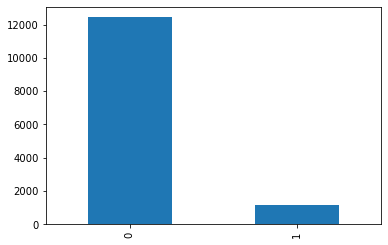

In [10]:
df['great_customer_class'].value_counts().plot(kind='bar')

It is a very imbalanced dataset. Most customers are not great. :( 

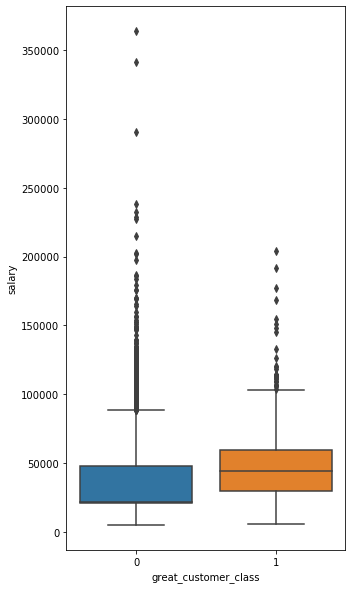

In [11]:
plt.figure(figsize = (5,10))
sns.boxplot(data=df, x='great_customer_class', y='salary')

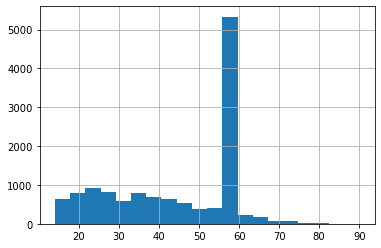

In [12]:
df['age'].hist(bins=20)

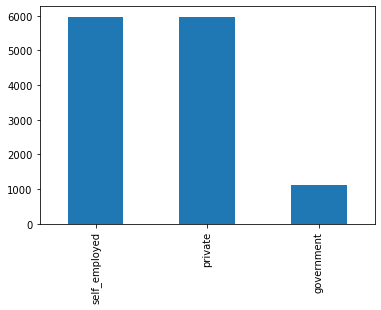

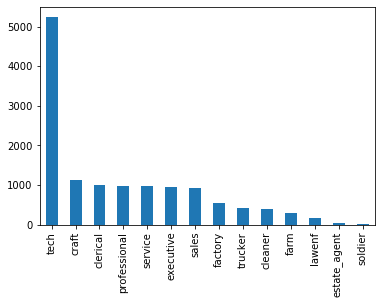

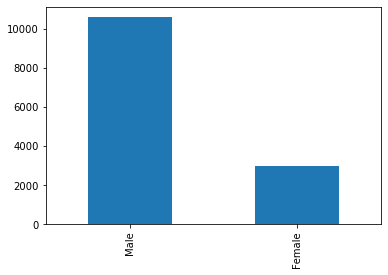

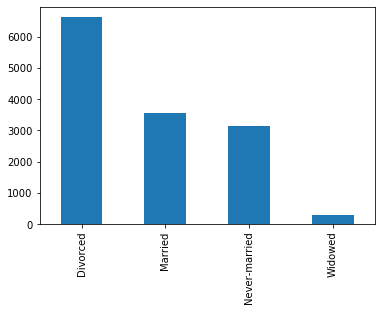

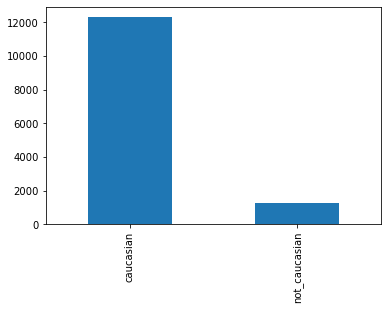

In [13]:
for category in ['workclass', 'occupation', 'sex', 'marital-status', 'race']:
    df[category].value_counts().plot(kind='bar')
    plt.show()

A few interesting observations. Age distribution in the survey data is quite skewed with a peak close to age 60. Any analysis might be skewed towards this. It would be nice to have a good distribution of age groups doing the survey. 

More males than females have done the survey.

In [14]:
df[df['occupation'].isnull()]['workclass'].sum()

0

*workclass* and *occupation* are often missing together

In [15]:
df['workclass'].value_counts()

self_employed    5972
private          5957
government       1127
Name: workclass, dtype: int64

## Summary

There are a few interesting insights that can guide us in our further analysis:
1. A lot of missing values in the dataset. 
2. It is an imbalanced dataset. There is a lot of negatives but not a lot of positives.
3. There are some correlations between variables - could be useful for imputation but the multicollinearity might affect some models/algorithms.